## Debugging RB cutouts

Eric Bellm , 2025-02-12 

In [14]:
import lsst.daf.butler
import numpy as np

In [1]:
import lsst.afw.display
display1 = lsst.afw.display.Display(backend='firefly', frame=1)
display2 = lsst.afw.display.Display(backend='firefly', frame=2)

In [3]:
collection = 'u/bos/DM-47926-DRP_DiffimWithFakes'

butler = lsst.daf.butler.Butler("/repo/main", collections=collection)

standard comcam test set: 

detector 4
(2024120600098, 2024112000208, 2024112800140, 2024111100094, 2024111900082, 2024111600297)
(all r band)


In [20]:
#pvi_ref = list(butler.query_datasets('calexp', detector=4, visit=2024120600098))
#len(pvi_ref)
#pvi = butler.get(pvi_ref[2])

In [21]:
# looking at injections
# pvi_ref = list(butler.query_datasets('injected_goodSeeingDiff_differenceExp', detector=4, band='r'))
# len(pvi_ref)
#difference = butler.get('injected_goodSeeingDiff_differenceExp', pvi_ref[0].dataId) 
#diaSrc = butler.get('injected_goodSeeingDiff_diaSrc', pvi_ref[0].dataId)
#match = butler.get('injected_goodSeeingDiff_matchDiaSourceTable', pvi_ref[0].dataId)

In [4]:
dataId = {'instrument': 'LSSTComCam', 'detector': 4, 'visit': 2024112800140}

In [42]:
difference = butler.get('injected_goodSeeingDiff_differenceExp', dataId) 
#template = butler.get('goodSeeingDiff_matchedExp', dataId)
diaSrc = butler.get('injected_goodSeeingDiff_diaSrc', dataId)

In [45]:
display1.image(difference)
#display1.centroids(diaSrc, size=10, ctype='red')

In [7]:
len(diaSrc)

284

In [60]:
diaSrcTbl = butler.get('injected_goodSeeingDiff_diaSrcTable', dataId)

In [61]:
#diaSrcTbl.columns.tolist()

In [62]:
diaSrcTbl[diaSrcTbl['pixelFlags_injectedCenter']==True]

,diaSourceId,visit,detector,band,diaObjectId,ssObjectId,parentDiaSourceId,midpointMjdTai,bboxSize,time_processed,...,shape_flag_no_pixels,shape_flag_not_contained,shape_flag_parent_source,trail_flag_edge,pixelFlags_streak,pixelFlags_streakCenter,pixelFlags_injected,pixelFlags_injectedCenter,pixelFlags_injected_template,pixelFlags_injected_templateCenter
1,191579056364322818,2024112800140,4,r,0,0,0,60643.067464,43,2025-02-07 18:28:11.413476,...,False,False,False,False,False,False,True,True,False,False
24,191579056364322841,2024112800140,4,r,0,0,0,60643.067464,121,2025-02-07 18:28:11.413476,...,False,False,False,False,False,False,True,True,False,False
26,191579056364322843,2024112800140,4,r,0,0,0,60643.067464,23,2025-02-07 18:28:11.413476,...,False,False,False,False,False,False,True,True,False,False
29,191579056364322846,2024112800140,4,r,0,0,0,60643.067464,25,2025-02-07 18:28:11.413476,...,False,False,False,False,False,False,True,True,False,False
34,191579056364322851,2024112800140,4,r,0,0,0,60643.067464,28,2025-02-07 18:28:11.413476,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,191579056364323085,2024112800140,4,r,0,0,0,60643.067464,27,2025-02-07 18:28:11.413476,...,False,False,False,False,False,False,True,True,False,False
269,191579056364323086,2024112800140,4,r,0,0,0,60643.067464,32,2025-02-07 18:28:11.413476,...,False,False,False,False,False,False,True,True,False,False
274,191579056364323091,2024112800140,4,r,0,0,0,60643.067464,22,2025-02-07 18:28:11.413476,...,False,False,False,False,False,False,True,True,False,False
280,191579056364323097,2024112800140,4,r,0,0,0,60643.067464,26,2025-02-07 18:28:11.413476,...,False,False,False,False,False,False,True,True,False,False


In [46]:
test_diasrc = 191579056364322851
test_x = diaSrcTbl[diaSrcTbl['diaSourceId'] == test_diasrc].x
test_y = diaSrcTbl[diaSrcTbl['diaSourceId'] == test_diasrc].y
display1.dot('+', test_x, test_y, size=10, ctype='blue')

In [50]:
    cols_to_export = ["diaSourceId", "visit", "detector", "diaObjectId",
                          "ssObjectId", "midpointMjdTai", "ra", "dec", "x", "y",
                          "apFlux", "apFluxErr", "snr", "psfFlux", "psfFluxErr",
                          "isDipole", "trailLength", "band", "extendedness",
                          "pixelFlags_bad", "pixelFlags_cr", "pixelFlags_crCenter",
                          "pixelFlags_edge", "pixelFlags_interpolated", "pixelFlags_interpolatedCenter",
                          "pixelFlags_offimage", "pixelFlags_saturated", "pixelFlags_saturatedCenter",
                          "pixelFlags_suspect", "pixelFlags_suspectCenter", "pixelFlags_streak",
                          "pixelFlags_streakCenter", "pixelFlags_injected", "pixelFlags_injectedCenter",
                          "pixelFlags_injected_template", "pixelFlags_injected_templateCenter"]


In [53]:
diaSrcTbl.loc[diaSrcTbl['diaSourceId'] == test_diasrc, cols_to_export]

,diaSourceId,visit,detector,diaObjectId,ssObjectId,midpointMjdTai,ra,dec,x,y,...,pixelFlags_saturated,pixelFlags_saturatedCenter,pixelFlags_suspect,pixelFlags_suspectCenter,pixelFlags_streak,pixelFlags_streakCenter,pixelFlags_injected,pixelFlags_injectedCenter,pixelFlags_injected_template,pixelFlags_injected_templateCenter
34,191579056364322851,2024112800140,4,0,0,60643.067464,53.290335,-28.007764,257.133551,310.744796,...,False,False,False,False,False,False,True,True,False,False


In [15]:
np.sum(diaSrcTbl['pixelFlags_injectedCenter']==True)

84

In [17]:
matchedTbl = butler.get('injected_goodSeeingDiff_matchDiaSourceTable', dataId)

In [35]:
#matchedTbl.columns.tolist()

In [18]:
matchedTbl

,injection_id,injection_flag,injection_draw_size,ra_ssi,dec_ssi,source_type,mag,host_id,host_magnitude,host_ra,...,shape_flag_no_pixels,shape_flag_not_contained,shape_flag_parent_source,trail_flag_edge,pixelFlags_streak,pixelFlags_streakCenter,pixelFlags_injected,pixelFlags_injectedCenter,pixelFlags_injected_template,pixelFlags_injected_templateCenter
0,31,0,26,53.437371,-27.800501,DeltaFunction,21.481216,1839,21.440245,53.437214,...,False,False,False,False,False,False,True,True,False,False
1,34,0,26,53.450379,-27.805380,DeltaFunction,22.468027,1723,21.796766,53.450126,...,False,False,False,False,False,False,True,True,False,False
2,0,0,24,53.527522,-27.838345,DeltaFunction,23.068434,2181,22.387845,53.527332,...,False,False,False,False,False,False,True,True,False,False
3,1,0,26,53.447909,-27.885014,DeltaFunction,23.260920,1455,23.029471,53.447787,...,False,False,False,False,False,False,True,True,False,False
4,2,0,26,53.454073,-27.837116,DeltaFunction,23.429111,1575,22.949836,53.454010,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,95,0,24,52.831254,-28.244553,DeltaFunction,23.031750,1,0.000000,0.000000,...,False,False,False,False,False,False,True,True,False,False
841,96,0,26,52.840441,-28.082781,DeltaFunction,20.071131,1,0.000000,0.000000,...,False,False,False,False,False,False,True,True,False,False
842,97,0,22,52.640217,-28.235240,DeltaFunction,23.678858,1,0.000000,0.000000,...,False,False,False,False,False,False,True,True,False,False
843,98,0,22,52.670993,-28.210934,DeltaFunction,25.245422,1,0.000000,0.000000,...,None,None,None,None,None,None,None,None,None,None


In [19]:
np.sum(matchedTbl['pixelFlags_injectedCenter']==True)

677

In [27]:
matchedTbl[matchedTbl['diaSourceId'] == test_diasrc]

,injection_id,injection_flag,injection_draw_size,ra_ssi,dec_ssi,source_type,mag,host_id,host_magnitude,host_ra,...,shape_flag_no_pixels,shape_flag_not_contained,shape_flag_parent_source,trail_flag_edge,pixelFlags_streak,pixelFlags_streakCenter,pixelFlags_injected,pixelFlags_injectedCenter,pixelFlags_injected_template,pixelFlags_injected_templateCenter
409,25,0,24,53.290329,-28.007758,DeltaFunction,21.686685,159,21.685969,53.290232,...,False,False,False,False,False,False,True,True,False,False


In [20]:
matchedPvi = butler.get('injected_goodSeeingDiff_matchPVIDiaSrc', dataId)

In [21]:
matchedPvi

,injection_id,injection_flag,injection_draw_size,ra_ssi,dec_ssi,source_type,mag,host_id,host_magnitude,host_ra,...,shape_flag_no_pixels,shape_flag_not_contained,shape_flag_parent_source,trail_flag_edge,pixelFlags_streak,pixelFlags_streakCenter,pixelFlags_injected,pixelFlags_injectedCenter,pixelFlags_injected_template,pixelFlags_injected_templateCenter
0,0,0,24,53.234917,-28.093835,DeltaFunction,23.553635,2328,23.553067,53.235071,...,False,False,False,False,False,False,True,True,False,False
1,1,0,24,53.181975,-28.066856,DeltaFunction,23.129028,782,23.127445,53.182145,...,False,False,False,False,False,False,True,True,False,False
2,2,0,26,53.118914,-28.090736,DeltaFunction,21.209366,1187,21.208695,53.118874,...,False,False,False,False,False,False,True,True,False,False
3,3,0,24,53.195370,-28.082348,DeltaFunction,22.915673,605,22.915063,53.195537,...,False,False,False,False,True,True,True,True,False,False
4,4,0,24,53.085033,-28.090556,DeltaFunction,23.210934,1461,23.209863,53.085005,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,95,0,24,53.277734,-28.004918,DeltaFunction,22.535668,1,0.000000,0.000000,...,False,False,False,False,False,False,True,True,False,False
87,96,0,26,53.123057,-28.081580,DeltaFunction,21.115646,1,0.000000,0.000000,...,False,False,False,False,False,False,True,True,False,False
88,97,0,26,53.182590,-28.039763,DeltaFunction,23.637521,1,0.000000,0.000000,...,False,False,False,False,False,False,True,True,False,False
89,98,0,24,53.133404,-27.936568,DeltaFunction,23.607264,1,0.000000,0.000000,...,False,False,False,False,False,False,True,True,False,False


In [28]:
matchedPvi[matchedPvi['diaSourceId'] == test_diasrc]

,injection_id,injection_flag,injection_draw_size,ra_ssi,dec_ssi,source_type,mag,host_id,host_magnitude,host_ra,...,shape_flag_no_pixels,shape_flag_not_contained,shape_flag_parent_source,trail_flag_edge,pixelFlags_streak,pixelFlags_streakCenter,pixelFlags_injected,pixelFlags_injectedCenter,pixelFlags_injected_template,pixelFlags_injected_templateCenter
25,25,0,24,53.290329,-28.007758,DeltaFunction,21.686685,159,21.685969,53.290232,...,False,False,False,False,False,False,True,True,False,False


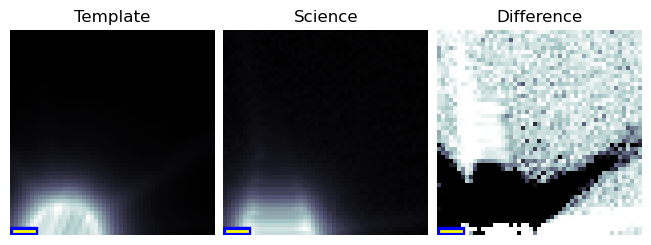

In [32]:
from IPython.display import Image
Image(filename='/sdf/group/rubin/shared/notebooks/real_bogus/comcam_drp_fakes_DM-47926/images/191579056364320000/191579056364322851.png') 


In [41]:
test_diasrc

191579056364322851

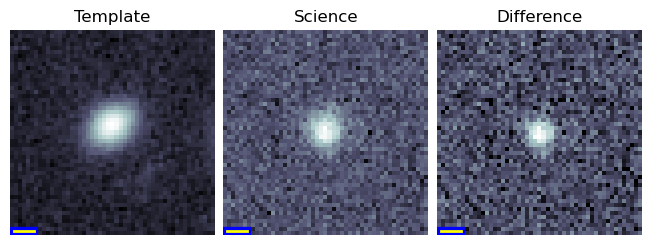

In [63]:
Image(filename='/sdf/group/rubin/user/ebellm/stack/tasso/scripts/debug_cutouts/images/191579056364320000/191579056364322851.png') 
